### Q1. Do smokers have higher insurance charges than non-smokers?

H0: Null Hypothesis "There is no difference in insurance charges between smokers and non smokers."

H1: Alternate Hypothesis: "There is a higher insurance charge for smokers than for non-smokers."

We have a numeric target with 2 samples, so will perform the 2-sample T-test

In [311]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [312]:
#Load Data
df = pd.read_csv('Data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [313]:
#compare number of smokers vs non-smokers
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [314]:
#split data into 2 groups
smoker_df = df.loc[df['smoker']== 'yes'].copy()
non_smoker_df = df.loc[df['smoker']== 'no'].copy()

In [315]:
#define feature of interest
smoker_charges = smoker_df['charges']
non_smoker_charges = non_smoker_df['charges']

#### Assumption: Outliers

In [316]:
#check for outliers in smoker group
zscores= stats.zscore(smoker_charges)
outliers = abs(zscores)>3
np.sum(outliers)

0

In [317]:
#check for outliers in non-smoker group
zscores= stats.zscore(non_smoker_charges)
outliers2 = abs(zscores)>3
np.sum(outliers2)

24

In [318]:
#remove outliers for non-smoker group group
non_smoker_charges = non_smoker_charges[(np.abs(stats.zscore(non_smoker_charges)) < 3)]

#### Assumption: Normality

In [319]:
#test the smoker group for normality
result_smoker_charges = stats.normaltest(smoker_charges)
result_smoker_charges

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)

In [320]:
#test the non smoker group for normality
result_non_smoker_charges = stats.normaltest(non_smoker_charges)
result_non_smoker_charges

NormaltestResult(statistic=163.80367047789198, pvalue=2.6945416315543976e-36)

We have met the assumption of normal distribution (p < 0.05)

#### Assumption: Equal Variance

In [321]:
#Test for equal variance
result = stats.levene(smoker_charges, non_smoker_charges)
result

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)

We have met the assumption of equal variance(p < 0.05)

In [322]:
#perform t-test with equal_var set to false
result = stats.ttest_ind(smoker_charges, non_smoker_charges, equal_var = False)
result

Ttest_indResult(statistic=33.732305987092516, pvalue=2.575322662587431e-104)

In [323]:
#is our result significant
print(f"p-value={result.pvalue:.10f}")
print(f"Significant: {result.pvalue <.05}")

p-value=0.0000000000
Significant: True


Interpetation: 

p-value < 0.05 (alpha) therefore we reject the null hypothesis and support the alternative hypothesis, i.e. there is a higher insurance charge for smokers vs non-smokers.

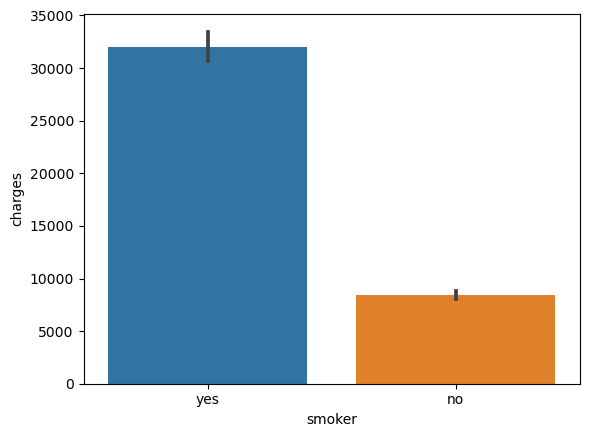

In [324]:
#Show a supporting visualization that helps display the result
sns.barplot(data=df, x='smoker',y='charges');

### Q2. Are men more likely to smoke than women?

H0: Null Hypothesis "There is no likelihood that men are more inclined to smoke than women."

H1: Alternate Hypothesis: "Men are more likely to smoke than women."

We have a categorical target with 2 samples, so will perform the Chi-Square test

In [325]:
#compare number of smokers vs non-smokers by sex (create contingency table)
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


In [326]:
# Run the Test and Save the Output
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result

In [327]:
# Check our p-value
print(p)
p<.05

0.006548143503580696


True

Interpetation: 

p-value < 0.05 (alpha) therefore we reject the null hypothesis and support the alternative hypothesis, i.e. men are more likely to smoke than women.

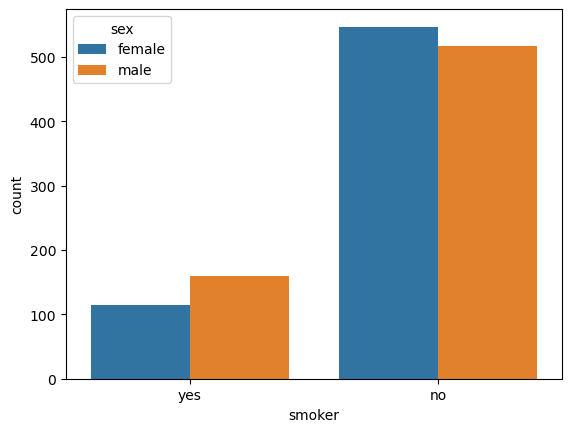

In [328]:
#Show a supporting visualization that helps display the result
sns.countplot(data=df, x='smoker', hue='sex');

### Q3. Do different regions have different charges, on average?

H0: Null Hypothesis "There is no difference in average charges between the different regions."

H1: Alternate Hypothesis: "There are different average charges for different regions."

We have a numeric target with 4 samples/groups, so will perform the oneway ANOVA test

In [329]:
#calculate the average (mean) of charges grouped by region
df.groupby(['region'])['charges'].mean()

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

In [330]:
## Create groups dictionary.
groups = {}
## Loop through all unique categories
for i in df['region'].unique():
    ## Get series for group and rename
    data = df.loc[df['region']==i,'charges'].copy()
  
   # save into the dictionary
    groups[i] = data

groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

#### Assumption: Normality

In [331]:
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
southwest,325.0,6.125298e-23,102.294059
southeast,364.0,4.953297e-15,65.877446
northwest,325.0,5.184209e-24,107.232850
northeast,324.0,1.455431e-19,86.747629


We have met the assumption of normal distribution (p < 0.05)

In [332]:
### checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
southwest,325.0,6.125298e-23,102.294059,True
southeast,364.0,4.953297e-15,65.877446,True
northwest,325.0,5.184209e-24,107.232850,True
northeast,324.0,1.455431e-19,86.747629,True


#### Assumption: Equal variance

In [333]:
stats.levene(*groups.values())

LeveneResult(statistic=5.559966758410606, pvalue=0.0008610590250786703)

We have met the assumption of equal variance (p < 0.05)

In [334]:
# perform the correct hypothesis test
result = stats.f_oneway( *groups.values())
result

F_onewayResult(statistic=2.96962669358912, pvalue=0.0308933560705201)

Interpetation: 

p-value < 0.05 (alpha) therefore we reject the null hypothesis and support the alternative hypothesis, i.e. there are different average charges for different regions.

In [335]:
#Check which groups were significantly different
## save the values as charges and the labels to the region
values = df['charges']
labels = df['region']

In [336]:
#perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
northeast,northwest,-988.8091,0.7245,-3428.9343,1451.3161,False
northeast,southeast,1329.0269,0.4745,-1044.9417,3702.9955,False
northeast,southwest,-1059.4471,0.6792,-3499.5723,1380.6781,False
northwest,southeast,2317.8361,0.0583,-54.1994,4689.8716,False
northwest,southwest,-70.638,0.9999,-2508.8826,2367.6066,False
southeast,southwest,-2388.4741,0.0477,-4760.5096,-16.4386,True


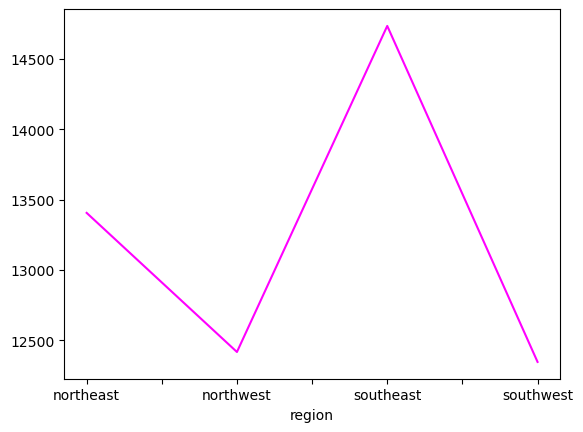

In [337]:
#Show a supporting visualization that helps display the result
#sns.barplot(data=df, x='region',y='charges');
df.groupby(['region'])['charges'].mean().plot(color='magenta');